In [188]:
#import to help manipulate data
import pandas as pd 
#import to help plot a figure
import matplotlib.pyplot as plt  

In [189]:
#import the raw data
df = pd.read_csv("Lumify Trend CSV.csv")   
df

,Date,Advertiser,Advertiser ID,Order,Order ID,Total cost,Impressions,DPV,Purchases,Sales USD
0,6-Jan-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,4.604850e+12,487.51,127712,85,0,0.00
1,7-Jan-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,4.604850e+12,286.79,78030,193,1,16.97
2,8-Jan-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,4.604850e+12,337.16,84055,278,16,253.04
3,9-Jan-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,4.604850e+12,363.46,96980,287,11,148.87
4,10-Jan-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,4.604850e+12,545.86,162443,220,3,41.34
...,...,...,...,...,...,...,...,...,...,...
620,5-May-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Mar20_XRTB...,8.259580e+12,367.42,111394,37,3,47.18
621,6-May-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Mar20_XRTB...,8.259580e+12,462.13,144444,243,3,78.19
622,7-May-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Mar20_XRTB...,8.259580e+12,297.74,110929,321,2,32.21
623,8-May-20,Bausch & Lomb Inc,6.719020e+12,201912.2680_B&L_Lumify 2020_Jan20 - Mar20_XRTB...,8.259580e+12,306.91,115717,305,3,71.24


In [190]:
#Grouping data into weeks for each Order
df["Date"] = pd.to_datetime(df['Date'])
df1 = df.groupby(['Order', pd.Grouper(key='Date', freq='W')])['Impressions','DPV','Purchases','Total cost','Sales USD'].sum()
df1

Impressions  \
Order                                              Date                      
201912.2680_B&L Lumify 2020_Jan20 - Dec20_XRTB_... 2020-01-12      2041616   
                                                   2020-01-19       894868   
                                                   2020-01-26       920210   
                                                   2020-02-02      1166138   
                                                   2020-02-09      1435764   
...                                                                    ...   
201912.2680_Bausch & Lomb_WM NY_ Lumify 2020_VC... 2020-04-12       247835   
                                                   2020-04-19       191662   
                                                   2020-04-26       193243   
                                                   2020-05-03       103384   
                                                   2020-05-10            0   

                                                                DPV  \
Order                                              Date               
201912.2680_B&L Lumify 2020_Jan20 - Dec20_XRTB_... 2020-01-12  2633   
                                                   2020-01-19  1593   
                                                   2020-01-26  1471   
                                                   2020-02-02  1610   
                                                   2020-02-09  1921   
...                                                             ...   
201912.2680_Bausch & Lomb_WM NY_ Lumify 2020_VC... 2020-04-12  5420   
                                                   2020-04-19  4633   
                                                   2020-04-26  4623   
                                                   2020-05-03  3355   
                                                   2020-05-10    50   

                                                               Purchases  \
Order                                              Date                    
201912.2680_B&L Lumify 2020_Jan20 - Dec20_XRTB_... 2020-01-12        157   
                                                   2020-01-19        139   
                                                   2020-01-26        122   
                                                   2020-02-02        174   
                                                   2020-02-09        197   
...                                                                  ...   
201912.2680_Bausch & Lomb_WM NY_ Lumify 2020_VC... 2020-04-12         13   
                                                   2020-04-19          8   
                                                   2020-04-26          9   
                                                   2020-05-03         14   
                                                   2020-05-10          2   

                                                               Total cost  \
Order                                              Date                     
201912.2680_B&L Lumify 2020_Jan20 - Dec20_XRTB_... 2020-01-12     7730.34   
                                                   2020-01-19     2818.04   
                                                   2020-01-26     2894.63   
                                                   2020-02-02     3761.84   
                                                   2020-02-09     4853.29   
...                                                                   ...   
201912.2680_Bausch & Lomb_WM NY_ Lumify 2020_VC... 2020-04-12     5180.63   
                                                   2020-04-19     5176.57   
                                                   2020-04-26     5175.68   
                                                   2020-05-03     2941.75   
                                                   2020-05-10        0.00   

                                                               Sales USD  
Order                                              Date   

In [191]:
#creating new calculated metrics
df1["DPVR"] = df1["DPV"]/df1["Impressions"]
df1["PR"] = df1["Purchases"]/df1["Impressions"]
df1['ROAS'] = df1['Sales USD']/df1['Total cost']
df1

Impressions  \
Order                                              Date                      
201912.2680_B&L Lumify 2020_Jan20 - Dec20_XRTB_... 2020-01-12      2041616   
                                                   2020-01-19       894868   
                                                   2020-01-26       920210   
                                                   2020-02-02      1166138   
                                                   2020-02-09      1435764   
...                                                                    ...   
201912.2680_Bausch & Lomb_WM NY_ Lumify 2020_VC... 2020-04-12       247835   
                                                   2020-04-19       191662   
                                                   2020-04-26       193243   
                                                   2020-05-03       103384   
                                                   2020-05-10            0   

                                                                DPV  \
Order                                              Date               
201912.2680_B&L Lumify 2020_Jan20 - Dec20_XRTB_... 2020-01-12  2633   
                                                   2020-01-19  1593   
                                                   2020-01-26  1471   
                                                   2020-02-02  1610   
                                                   2020-02-09  1921   
...                                                             ...   
201912.2680_Bausch & Lomb_WM NY_ Lumify 2020_VC... 2020-04-12  5420   
                                                   2020-04-19  4633   
                                                   2020-04-26  4623   
                                                   2020-05-03  3355   
                                                   2020-05-10    50   

                                                               Purchases  \
Order                                              Date                    
201912.2680_B&L Lumify 2020_Jan20 - Dec20_XRTB_... 2020-01-12        157   
                                                   2020-01-19        139   
                                                   2020-01-26        122   
                                                   2020-02-02        174   
                                                   2020-02-09        197   
...                                                                  ...   
201912.2680_Bausch & Lomb_WM NY_ Lumify 2020_VC... 2020-04-12         13   
                                                   2020-04-19          8   
                                                   2020-04-26          9   
                                                   2020-05-03         14   
                                                   2020-05-10          2   

                                                               Total cost  \
Order                                              Date                     
201912.2680_B&L Lumify 2020_Jan20 - Dec20_XRTB_... 2020-01-12     7730.34   
                                                   2020-01-19     2818.04   
                                                   2020-01-26     2894.63   
                                                   2020-02-02     3761.84   
                                                   2020-02-09     4853.29   
...                                                                   ...   
201912.2680_Bausch & Lomb_WM NY_ Lumify 2020_VC... 2020-04-12     5180.63   
                                                   2020-04-19     5176.57   
                                                   2020-04-26     5175.68   
                                                   2020-05-03     2941.75   
                                                   2020-05-10        0.00   

                                                               Sales USD  \
Order                                              Date  

In [192]:
#Filter for each order

# After pivoting, we need to reset index inorder to have "Order" and "Date" become new columns 
df1 = df1.reset_index()

#Examples of the different Orders I would usually pull: 
#df2 ENTHUSIASTS (Beauty)
#df3 EYE (Eye Care)
#df4 Male (Male groomer)
#df5 ROAS (ROAS)
#df6 VCB (VCB)

df2 = df1[df1['Order'].str.contains('ENTHUSIASTS')]
df2

,Order,Date,Impressions,DPV,Purchases,Total cost,Sales USD,DPVR,PR,ROAS
18,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-01-12,936054,1472,40,3167.41,613.12,0.001573,0.000043,0.193571
19,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-01-19,1195982,1330,44,3718.20,675.75,0.001112,0.000037,0.181741
20,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-01-26,1134377,1392,45,3581.47,742.95,0.001227,0.000040,0.207443
21,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-02-02,1765152,1647,62,5567.82,1033.40,0.000933,0.000035,0.185602
22,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-02-09,1090578,1516,42,3625.16,654.59,0.001390,0.000039,0.180569
23,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-02-16,141687,520,33,448.57,500.05,0.003670,0.000233,1.114765
24,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-02-23,679498,1131,33,2182.53,474.18,0.001664,0.000049,0.217262
25,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-03-01,258359,212,3,794.21,34.60,0.000821,0.000012,0.043565
26,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-03-08,144913,33,2,432.01,28.88,0.000228,0.000014,0.066850
27,201912.2680_B&L_Lumify 2020_Jan20 - Dec20_XRTB...,2020-03-15,1080617,611,18,3194.96,311.43,0.000565,0.000017,0.097475


In [193]:
type(df2)

pandas.core.frame.DataFrame

[]

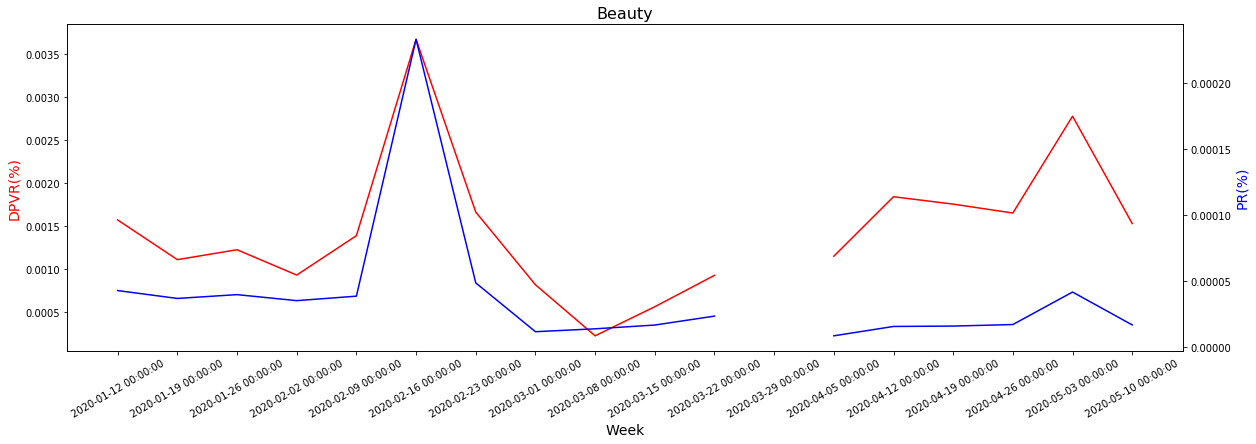

In [194]:
#Plot the graph for each Order

fig, ax = plt.subplots(figsize=(20,6))
ax.plot(df2['Date'], df2['DPVR'], color="red")
ax.set_title("Beauty", fontsize=16)
ax.set_xlabel("Week", fontsize=14)
ax.set_ylabel("DPVR(%)", color="red", fontsize=14)
#Need to include second y-axis
ax2=ax.twinx()
ax2.plot(df2['Date'], df2['PR'], color="blue")
ax2.set_ylabel("PR(%)", color="blue", fontsize=14)

#fix number of ticks and tick name
Date2 = df2['Date']
ax.set_xticks(Date2)
ax.set_xticklabels(Date2, rotation = 30)

ax.plot()

In [ ]:
# Nextsteps:
#     For future reports: need to replace the raw report, the order name, and the metrics depending on if its for a DPVR or a ROAS order
#     Would like to change date to include only date and not the time
#         I have tried using Boolean to imitate the LEFT function in excel
#         I have tried using DateFormatter: 
#             date_form = DateFormatter('%m-%d')
#             ax.xaxis.set_major_formatter(date_form)
#         I have tried creating a label to manually write out the weeks in the %m-%d format, but it did not work with ax.set_xticks
        
# Helpful Resources:
#     Grouping week: https://pbpython.com/pandas-grouper-agg.html
#     Plotting graph: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/
#     Modifying tick: https://stackoverflow.com/questions/11244514/modify-tick-label-text
#     Helping Hand: Joey and Ramy 